In [1]:
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Umer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
message = [line.rstrip() for line in open('SMSSpamCollection') ]

In [4]:
len(message)

5574

In [5]:
message[0]


'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
for messno,mess in enumerate(message[:5]):
    print(messno,mess)
    print('\n')
    
    

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though




In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('SMSSpamCollection',delimiter='\t',names=['labels','messages'])

In [9]:
df.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
labels      5572 non-null object
messages    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [11]:
df.describe()

,labels,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
df.groupby('labels').describe()

messages                                                               
          count unique                                                top freq
labels                                                                        
ham        4825   4516                             Sorry, I'll call later   30
spam        747    653  Please call our customer service representativ...    4

In [13]:
df['Length'] = df['messages'].apply(len)

In [14]:
df.head()

,labels,messages,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [61]:
df['messages'][1]

'Ok lar... Joking wif u oni...'

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

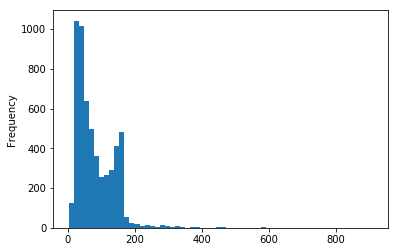

In [16]:
df['Length'].plot.hist(bins = 60)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021AB3DA7B70>,
      dtype=object)

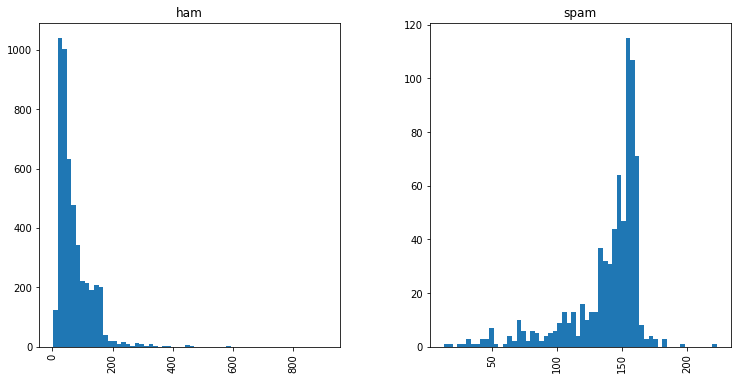

In [17]:
df.hist(column='Length',by='labels',figsize=(12,6),bins=60)

In [18]:
#clean the text
df['messages'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [19]:
import re

In [ ]:
email = re.sub('[^a-zA-z]',' ',df['messages'][0])

In [ ]:
email

In [ ]:
email.lower()

In [20]:
from nltk.corpus import stopwords

In [ ]:
email = email.split()

In [ ]:
email = [ps.stem(mail) for mail in email if not mail in set(stopwords.words('english'))]

In [ ]:
email

In [21]:
#stemming
from nltk.stem.porter import PorterStemmer

In [22]:
ps = PorterStemmer()

In [ ]:
type(email)

In [ ]:
email = ' '.join(email)

In [ ]:
email

In [ ]:
type(email)

In [23]:
corpus = []

In [24]:
for i in range(0,5572):
    email = re.sub('[^a-zA-z]',' ',df['messages'][i])
    email.lower()
    email = email.split()
    email = [ps.stem(mail) for mail in email if not mail in set(stopwords.words('english'))]
    email = ' '.join(email)
    corpus.append(email)
    

In [32]:
#bag of words model
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
cv = CountVectorizer(max_features=6300)

In [41]:
X = cv.fit_transform(corpus).toarray()

In [45]:
y = df['labels']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [48]:
from sklearn.naive_bayes import MultinomialNB

In [49]:
spam_detector = MultinomialNB()

In [51]:
spam_detector = spam_detector.fit(X_train,y_train)

In [68]:
prediction = spam_detector.predict(X_test)

In [69]:
prediction

array(['ham', 'spam', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
cm = confusion_matrix(y_test,prediction)
cm

array([[940,  15],
       [  6, 154]], dtype=int64)

In [72]:
cm.diagonal().sum()

1094

In [73]:
ar = (1094/1115)

In [74]:
ar

0.9811659192825112